In [ ]:
#크롤링: 데이터를 수집하는 행위
#웹에서 원하는 데이터를 수집
#웹은 htm/css로 디자인 되어 있다 
#html/css에서 원하는 값을 수집

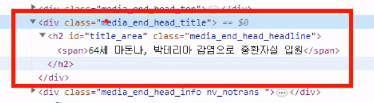

#### 태그<>로 이루어져 있다  
- 열린태그<> /닫힌태그</>
- 이 태그 사이에도 contant(내용)이 들어간다 이 내용에는 또 다른 태그들이 들어 갈 수 있다
- hr태그 img태그 이런 특수한 태그들만 닫힌 태그가 없다
- 기능이 너무 단순해서 적기만 하면 되는 것들이 이렇다
- 주요 내용은 모두 content에 들어 있기 때문에 크롤링에서는 content수집

- tag안에는 함수의 매개변수 같은 속성들이 있다
- class /id
    - class(.): 동일한 대상을 여러번 표현할 때 사용
    
    
           같은 이름이 여러개 존재
  - id(#): 페이지에 한번 표현할때 사용
  
          같은 이름이 존재하지 않는다
          
  ---
    
    

In [2]:
#글자 가지고올라면 그 글자가 있는 태그의 위치를 알아야 한다
#태그의 구조를 특징지어서 가져와 달라고 함
#태그의 class or id를 통해 특정지어주는 것도 가능함(보통 이걸 더 많이 사용함)

In [3]:
#선택자
#태그를 지칭할 수 있게 해줌
#div아래 div아래 div아래 h2아래 span
#바로 아래 자식태그 이 자식태그 포함해서 아래 있는 것들이 자손태그
# 자식 선책자 : > 하나만 건너갈때
# 자손 선택자:  (띄어쓰기) 여러개를 건너갈때
#div>div2>div3>n2>span
#div h2>span


In [ ]:
#검색하고 특정한 값을 가지고 올려고 함

In [13]:
#request함수 정보 모으는 라이브러리
import requests as req

#데이터 수집할 주소
url = "https://search.naver.com/search.naver?where=nexearch&sm=top_sly.hst&fbm=0&acr=1&ie=utf8&query=%EC%9E%A5%EB%A7%88"
#a.news_tit
#주소에 접근
#해당 requests(브라우저)에 해당 url을 요청
#클라이언트가 서버에게 요청
#서버가 클라이언트에게 응답(response)> html/css문서 가져옴
res = req.get(url)
#res가 html/css문서
res
#아직은 문서가 아니고 응답받은 모든것 객체 여기 안에서 html/css문서 가져와야 함
#<Response [200]> 성공
#<Response [404]> 클라이언트 오류(우리의 실수) 클라이언트가 요청한 문서 못찾음(url 잘못적음)
#<Response [500]> 서버 오류(우리 잘못 없음) 너무 많은 정보 요청 받을 수 없는 정보 요청

<Response [200]>

In [15]:
#진짜 htmi 처럼 생김 문자열 이걸 진짜 htmi로 변경해 줘야 함

res.text

'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="장마 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'장마\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'장마\'의 네이버 통합검색 결과입니다."> <title>장마 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/s

In [9]:
#이 문자열을 진짜 htmi로 바꿔주는 게  BeautifulSoup
from bs4 import BeautifulSoup as bs
#우리가 원하는건 여러 정보중 html/css 값 이것만 가지고 오기
#이 'lxml'은 그냥 외우기
soup = bs(res.text,'lxml')
#가져오고 싶은값 특정해서 가지고오기
#soup는 html문서 select는 선택하겠다 
#a태그의 class가 news_tit인것을 가져와줘(가져오는 것의 대상은 a 태그)
data = soup.select('a.news_tit')

In [ ]:
#근데 이러면 조건에 해당하는 모든 a태그 가져와서 아직 완벽하게 내가 원하는 태그 아님
#a태그 안에 있는 내용을 인덱스로 가져오기
data

In [7]:
#뉴스 제목 하나가지고 옴 예를 특정지어 줘야 함
#fn+f12 하고 ctrl+ shift+c
#같은 라인에 있으면 부모태그가 아니라 형제태그임

In [12]:
#뉴스의 제목이 다 들어가 있는 data라는 함수에서 내가 원하는 0번만 가지고오고 그리고 그중 제목 가져오기 위해
#text 함수 사용
data[0].text

'중진공, 장마철 비상대응 체계 가동'

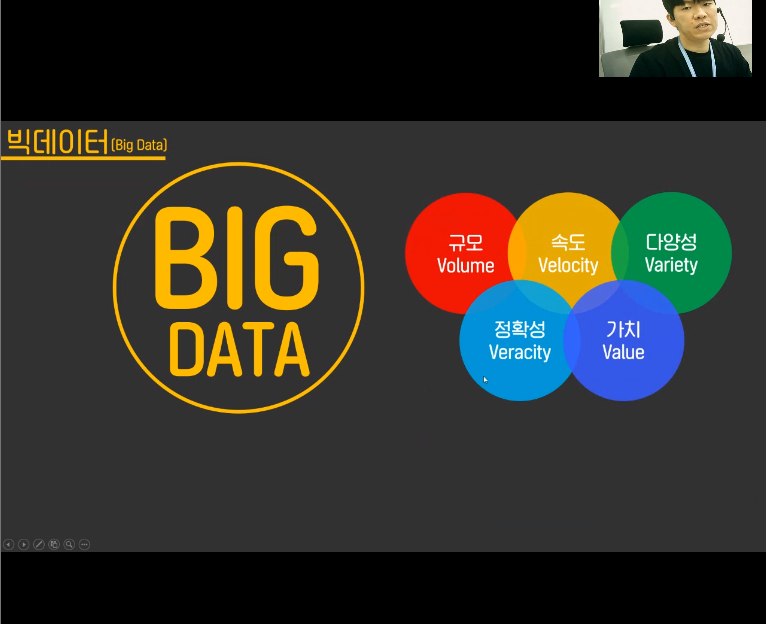

수집데이터의 형태


    형태가 있는가? 

    연산이 가능한가?

둘다 되면 정형 데이터 csv 스프레드시트

연산만 안되면 반정형 xml html 

둘 다 안되면 비정형 음악 사진등 형태가 없어 특정한 대상 찝기가 힘들다

클라이언트와 서버 

클라이언트가 서버한테 요청(리퀘스트) 

서버는 클라이언트한테 응답(리스폰스)

응답하면 html/css문서를 줄텐데 그것을 가지고 와서 찾아본다 이 문서는 가지고 있는게 아니라 그냥 보고있는것
그래서 요청하기 위해 request사용 파이썬에서 브라우저 역할 요청하고 응답정보를 처리해주는 역할

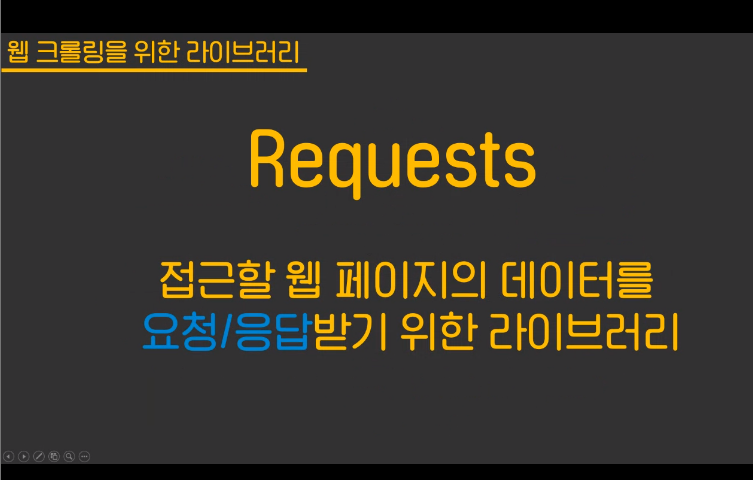

# 맬론 접속
# 이중 메뉴항목 가지고 오기
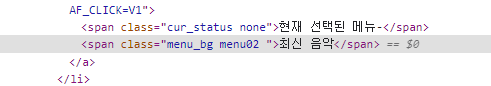
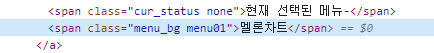


- 이둘은 다르게 보이지만 띄어쓰기를 통해 menu_bg menu01 이렇게 나눠져 있다
- 같은걸 가지고 오고 싶으면 둘이 같은 menu_bg
아니면  menu01